# Importing libraries and loading data

In [58]:
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd
start=dt.now()

# Process weathertypes, remove empty windspeed and store (ignore if it's already done)

(2882, 1)
(2882, 1)
(2882, 1)
(2882, 1)
(2882, 1)


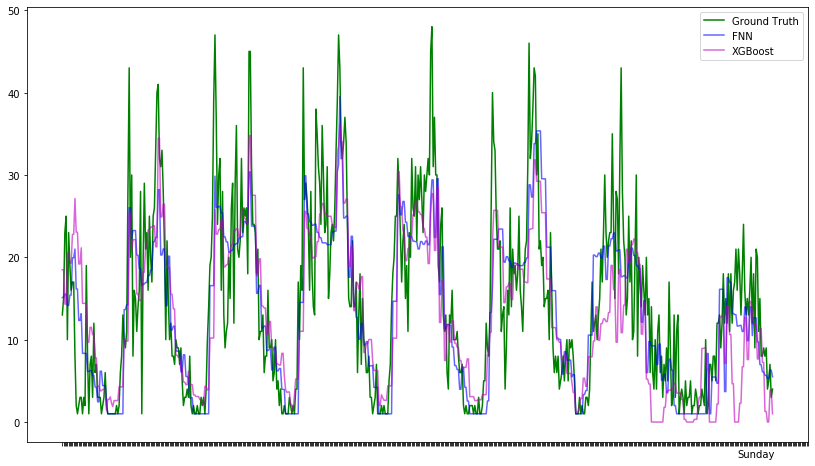

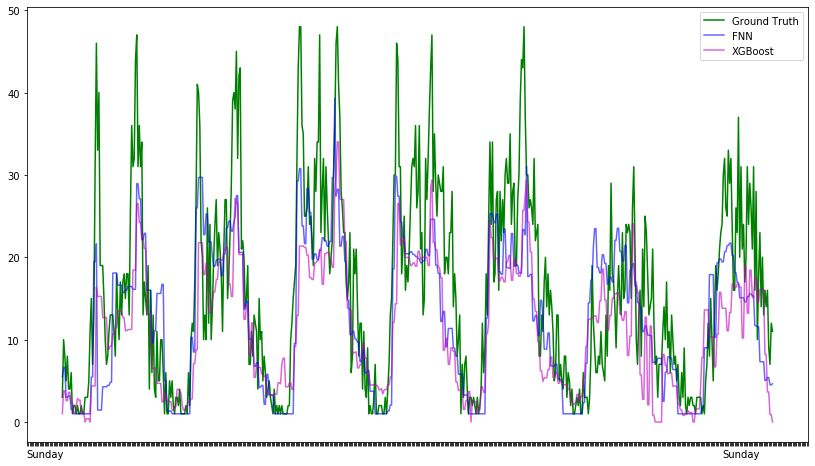

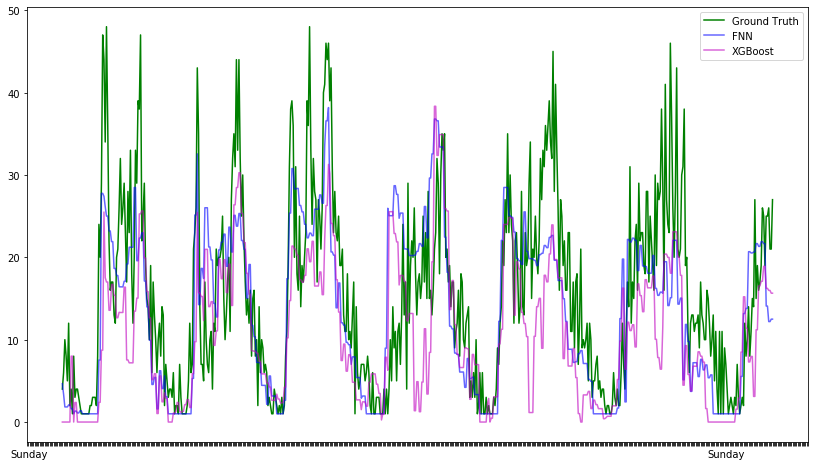

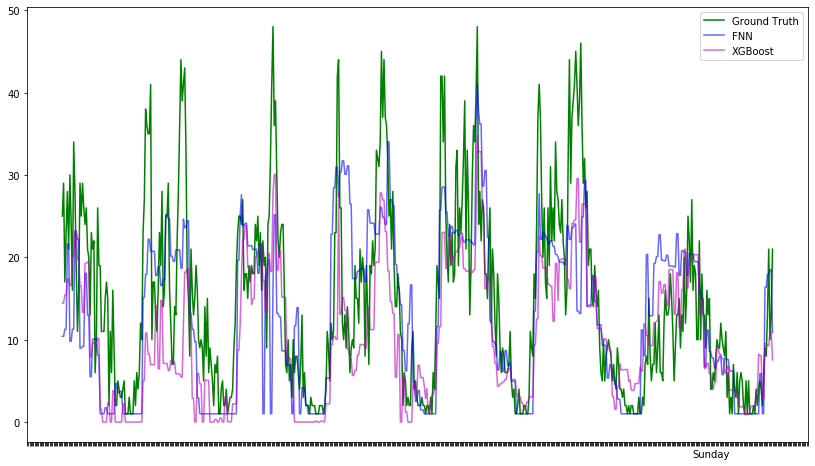

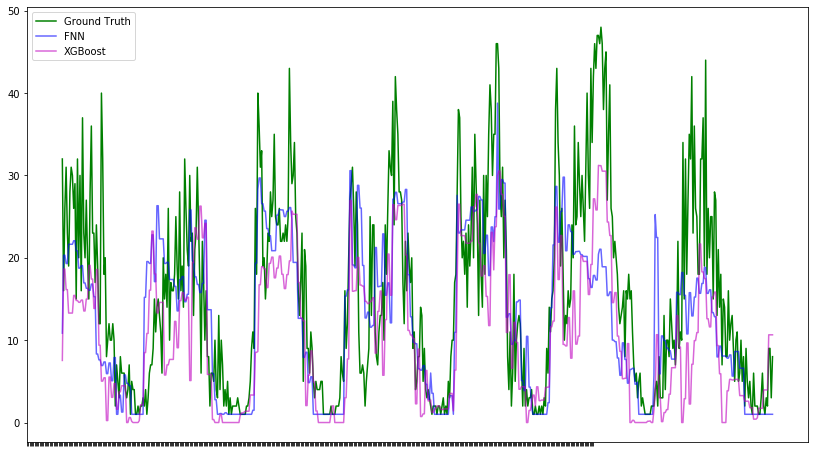

In [71]:
days=6

window=days*94
def show_models_prediction_graph(Ground_t,FNN_pred,Random_F_pred,svr_data,xgboost_data,min_value=None,max_value=None):
    plt.rcParams['figure.figsize'] = [14, 8]   
    fig, ax1 = plt.subplots(1,1)

    x1 = range(0,2678)
    
    squad = []
    for i in range(0,2678):
        if (i+2)%92==0:
            if (i+2)%(92*6)==0:
                squad.append("Sunday")
            else:
                squad.append(None)
        else:
            squad.append(None)

    ax1.set_xticks(x1)
    ax1.set_xticklabels(squad, minor=False, rotation=0)
    #print(Ground_t)
    l0, = plt.plot(Ground_t[min_value:max_value], 'g')
    l1, = plt.plot(FNN_pred[min_value:max_value], 'b', alpha=0.6)
    #l2, = plt.plot(Random_F_pred[min_value:max_value],'b', alpha=0.4)
    #l3, = plt.plot(svr_data[min_value:max_value],'r', alpha=0.4)
    l4, = plt.plot(xgboost_data[min_value:max_value],'m', alpha=0.6)
    
    plt.legend(['Ground Truth','FNN', 'XGBoost','SVM Regression','XGBoost'])
    
    plt.show()
def clean_data_removing_less_0_values(data):  
    print(data.shape)
    data[data<0]=0    
    return data
ground_data = clean_data_removing_less_0_values(pd.read_pickle('./data/model_data_prediction/Ground_t_predictions.bin'))    
fnn_data = clean_data_removing_less_0_values(pd.read_pickle('./data/model_data_prediction/FNN_predictions.bin'))
randomf_data = clean_data_removing_less_0_values(pd.read_pickle('./data/model_data_prediction/RandomForestRegressor_predictions.bin'))
svr_data = clean_data_removing_less_0_values(pd.read_pickle('./data/model_data_prediction/SVR_predictions.bin'))
xgb_data = clean_data_removing_less_0_values(pd.read_pickle('./data/model_data_prediction/XGBRegressor_predictions.bin'))

for i in range(0,int(len(xgb_data)/window)):
    show_models_prediction_graph(ground_data,fnn_data,randomf_data,svr_data,xgb_data,i*window,(i*window)+window)

    